In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

import helper

import os

In [13]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                      # transforms.Normalize([0.5, 0.5, 0.5], 
                                     #                       [0.5, 0.5, 0.5])
                                      ])

test_transforms = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

In [6]:
train_path = os.path.join(os.getcwd(), 'Cat_Dog_data', 'Cat_Dog_data', 'train')
test_path = os.path.join(os.getcwd(), 'Cat_Dog_data', 'Cat_Dog_data', 'test')

In [18]:
train_data = datasets.ImageFolder(train_path, transform=train_transforms)

test_data = datasets.ImageFolder(train_path, transform=test_transforms)

In [19]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle = False)


<AxesSubplot:>

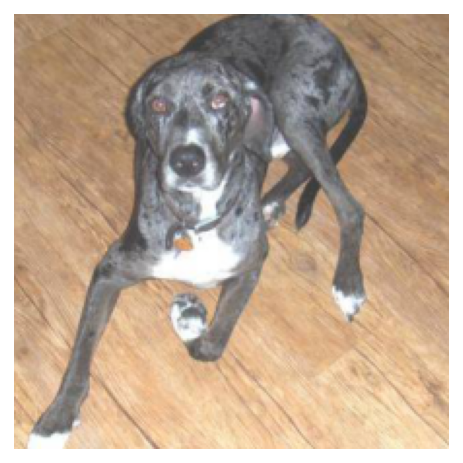

In [20]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

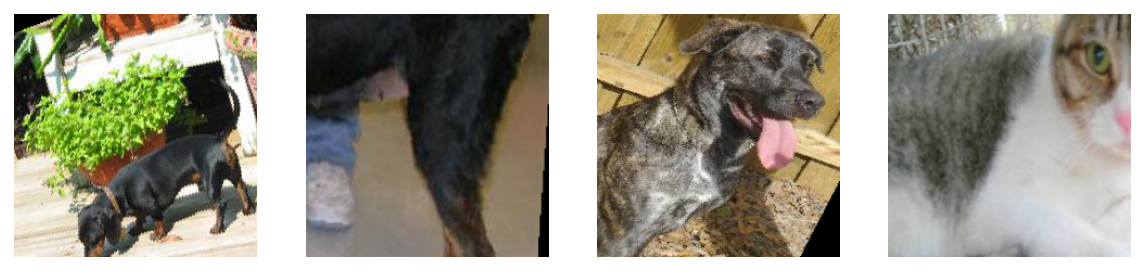

In [24]:
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)